## Question-1

#### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

#### Step 2. Import the dataset from this address.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|', index_col='user_id')

#### Step 3. Assign it to a variable called users

In [3]:
users = pd.read_csv(url, delimiter='|', index_col='user_id')

#### Step 4. Discover what is the mean age per occupation

In [4]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
mean_age_by_occupation

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [5]:
# Define a function to get the male ratio
def male_ratio(group):
    male = group[group['gender'] == 'M']['gender'].count()
    total = group['gender'].count()
    return male / total

male_ratio_by_occupation = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)
male_ratio_by_occupation

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

#### Step 6. For each occupation, calculate the minimum and maximum ages

In [6]:
age_range_by_occupation = users.groupby('occupation')['age'].agg([np.min, np.max])
age_range_by_occupation

,amin,amax
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7. For each combination of occupation and sex, calculate the mean age

In [7]:
mean_age_by_occupation_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()
mean_age_by_occupation_and_gender

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step 8. For each occupation present the percentage of women and men

In [8]:
# Define a function to get the gender percentage
def gender_percentage(group):
    male = group[group['gender'] == 'M']['gender'].count()
    female = group[group['gender'] == 'F']['gender'].count()
    total = group['gender'].count()
    return pd.Series({'% Male': male / total * 100, '% Female': female / total * 100})

gender_percentage_by_occupation = users.groupby('occupation').apply(gender_percentage)
gender_percentage_by_occupation

,% Male,% Female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


## Question-2

#### Step 1. Import the necessary libraries

In [9]:
import pandas as pd
import numpy as np

#### Step 2. Import the dataset from this address

In [10]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

#### Step 3. Assign it to a variable called euro12

In [11]:
euro12 = pd.read_csv(url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Step 4. Select only the Goal column

In [12]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5. How many team participated in the Euro2012?

In [13]:
num_teams = euro12['Team'].nunique()
num_teams

16

#### Step 6. What is the number of columns in the dataset?

In [14]:
num_cols = euro12.shape[1]
num_cols

35

#### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [15]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [16]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
discipline_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### Step 9. Calculate the mean Yellow Cards given per Team

In [17]:
mean_Yellow_Card = discipline[["Team","Yellow Cards"]]
mean_Yellow_Card.groupby("Team").mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


#### Step 10. Filter teams that scored more than 6 goals

In [18]:
high_scoring_teams = euro12[["Goals","Team"]].loc[(euro12["Goals"]>6)]
high_scoring_teams

,Goals,Team
5,10,Germany
13,12,Spain


#### Step 11. Select the teams that start with G

In [19]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']
teams_starting_with_G

5    Germany
6     Greece
Name: Team, dtype: object

#### Step 12. Select the first 7 columns

In [20]:
first_7_cols = euro12.iloc[:, :7]
first_7_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step 13. Select all columns except the last 3

In [21]:
all_but_last_3_cols = euro12.iloc[:, :-3]
all_but_last_3_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [22]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question-3

#### Step 1. Import the necessary libraries

In [23]:
import pandas as pd
import numpy as np

#### Step 2. Create 3 differents Series, each of length 100, as follows:
* The first a random number from 1 to 4
* The second a random number from 1 to 3
* The third a random number from 10,000 to 30,000

In [24]:
s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

#### Step 3. Create a DataFrame by joinning the Series by column

In [25]:
df = pd.concat([s1, s2, s3], axis=1)

In [26]:
df.head(10)

,0,1,2
0,3,3,10184
1,4,3,22544
2,1,3,11830
3,4,2,25991
4,4,3,23145
5,1,3,15371
6,2,2,20961
7,2,2,23795
8,4,2,10190
9,1,1,23537


#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [27]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [28]:
bigcolumn = pd.concat([s1, s2, s3], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])

#### Step 6. Ops it seems it is going only until index 99. Is it true?

In [29]:
print(bigcolumn.index.max())

299


#### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [30]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,bigcolumn
0,3
1,4
2,1
3,4
4,4
...,...
295,10906
296,28435
297,20101
298,25024


## Question-4

#### Step 1. Import the necessary libraries


In [31]:
import numpy as np
import pandas as pd

#### Step 2. Import the dataset from the attached file wind.txt


In [32]:
data = pd.read_table(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\wind.txt", delim_whitespace=True)

In [33]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.


In [34]:
date_strs = data['Yr'].astype(str) + '/' + data['Mo'].astype(str) + '/' + data['Dy'].astype(str)
data['date'] = pd.to_datetime(date_strs, format='%y/%m/%d')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
data = data.set_index('date')

In [35]:
data.head(10)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
2061-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
2061-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
2061-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
2061-01-09,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37


#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.


In [36]:
def fix_year(date):
    if date.year > 2000:
        year = date.year - 100
    else:
        year = date.year
    return pd.to_datetime(year * 10000 + date.month * 100 + date.day, format='%Y%m%d')

data.index = data.index.map(fix_year)
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)

#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].


In [37]:
data.index = pd.to_datetime(data.index, format='%y%m%d')
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)

#### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.


In [38]:
missing_values = data.isnull().sum()
missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### Step 7. Compute how many non-missing values there are in total.


In [39]:
non_missing_values = data.notnull().sum().sum()
non_missing_values

78857

#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.


In [40]:
mean_wind_speed = data.mean().mean()
mean_wind_speed

10.227982360836938

#### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.


In [41]:
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

In [42]:
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


#### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.


In [43]:
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

In [44]:
day_stats

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


#### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.


In [45]:
january_data = data[data.index.month == 1]
january_mean = january_data.mean()

In [46]:
january_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
1978-01-28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
1978-01-29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20


In [47]:
january_mean

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

#### Step 12. Downsample the record to a yearly frequency for each location.


In [48]:
data_yearly = data.resample('Y').mean()
data_yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13. Downsample the record to a monthly frequency for each location.


In [49]:
data_monthly = data.resample('M').mean()
data_monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14. Downsample the record to a weekly frequency for each location.


In [50]:
data_weekly = data.resample('W').mean()
data_weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [51]:
week_stats = data.loc['1961-01-02':'1961-12-25'].resample('W').agg(['min', 'max', 'mean', 'std'])

In [52]:
week_stats.columns = ['_'.join(col).strip() for col in week_stats.columns.values]

In [53]:
week_stats.head(52)

,RPT_min,RPT_max,RPT_mean,RPT_std,VAL_min,VAL_max,VAL_mean,VAL_std,ROS_min,ROS_max,...,CLO_mean,CLO_std,BEL_min,BEL_max,BEL_mean,BEL_std,MAL_min,MAL_max,MAL_mean,MAL_std
date,,,,,,,,,,,,,,,,,,,,,
1961-01-08,10.58,18.50,13.541429,2.631321,6.63,16.88,11.486667,3.949525,7.62,12.33,...,8.497143,1.704941,5.46,17.54,12.481429,4.349139,10.88,16.46,13.238571,1.773062
1961-01-15,9.04,19.75,12.468571,3.555392,3.54,12.08,8.967143,3.148945,7.08,19.50,...,7.571429,4.084293,5.25,20.71,11.125714,5.552215,5.17,16.92,11.024286,4.692355
1961-01-22,4.92,19.83,13.204286,5.337402,3.42,14.37,9.862857,3.837785,7.29,20.79,...,8.124286,4.783952,6.50,15.92,9.821429,3.626584,6.79,17.96,11.434286,4.237239
1961-01-29,13.62,25.04,19.880000,4.619061,9.96,23.91,16.141429,5.170224,12.67,25.84,...,15.640000,3.713368,14.04,27.71,20.930000,5.210726,17.50,27.63,22.530000,3.874721
1961-02-05,10.58,24.21,16.827143,5.251408,9.46,24.21,15.460000,5.187395,9.04,19.70,...,9.460000,2.839501,9.17,19.33,14.012857,4.210858,7.17,19.25,11.935714,4.336104
1961-02-12,16.00,24.54,19.684286,3.587677,11.54,21.42,16.417143,3.608373,13.67,21.34,...,14.440000,1.746749,15.21,26.38,21.832857,4.063753,17.04,21.84,19.155714,1.828705
1961-02-19,6.04,22.50,15.130000,5.064609,11.63,20.17,15.091429,3.575012,6.13,19.41,...,13.542857,2.531361,14.09,29.63,21.167143,5.910938,10.96,22.58,16.584286,4.685377
1961-02-26,7.79,25.80,15.221429,7.020716,7.08,21.50,13.625714,5.147348,6.08,22.42,...,12.730000,4.920064,9.59,23.21,16.304286,5.091162,6.67,23.87,14.322857,6.182283
1961-03-05,10.96,13.33,12.101429,0.997721,8.83,17.00,12.951429,2.851955,8.17,13.67,...,12.370000,1.593685,11.58,23.45,17.842857,4.332331,8.83,17.54,13.951667,3.021387


## Question-5

#### Step 1. Import the necessary libraries

In [54]:
import pandas as pd
import numpy as np

#### Step 2. Import the dataset from this address.


In [55]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
data = pd.read_csv(url, sep='\t')

#### Step 3. Assign it to a variable called chipo.


In [56]:
chipo = data

#### Step 4. See the first 10 entries


In [57]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5. What is the number of observations in the dataset?


In [58]:
chipo.shape[0]

4622

#### Step 6. What is the number of columns in the dataset?


In [59]:
chipo.shape[1]

5

#### Step 7. Print the name of all the columns.


In [60]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8. How is the dataset indexed?


In [61]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9. Which was the most-ordered item?


In [62]:
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().nlargest(1)
most_ordered_item

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

#### Step 10. For the most-ordered item, how many items were ordered?


In [63]:
print(int(most_ordered_item))

761


#### Step 11. What was the most ordered item in the choice_description column?


In [64]:
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().nlargest(1)
most_ordered_choice

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

#### Step 12. How many items were orderd in total?


In [65]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

#### Step 13.
* Turn the item price into a float
* Check the item price type
* Create a lambda function and change the type of item price
* Check the item price type


In [66]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) 

In [67]:
chipo['item_price'].dtype

dtype('float64')

In [68]:
chipo['item_price'] = chipo['item_price'].apply(int)

In [69]:
chipo['item_price'].dtype

dtype('int64')

In [70]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2
1,1,1,Izze,[Clementine],3
2,1,1,Nantucket Nectar,[Apple],3
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8


#### Step 14. How much was the revenue for the period in the dataset?


In [71]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

36616

#### Step 15. How many orders were made in the period?


In [72]:
orders = chipo['order_id'].nunique()
orders

1834

#### Step 16. What is the average revenue amount per order?


In [73]:
avg_revenue = revenue / orders
print(round(avg_revenue, 2))

19.97


#### Step 17. How many different items are sold?

In [74]:
items_sold = chipo['item_name'].nunique()
print(items_sold)

50


## Question-6

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\us-marriages-divorces-1867-2014.csv")

In [77]:
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [78]:
df['Ratio'] = df['Divorces_per_1000']/df['Marriages_per_1000']
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,Ratio
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.030928
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.032967
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.033333
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.034091
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.034091
...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.383562
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.394366
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.397059
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.411765


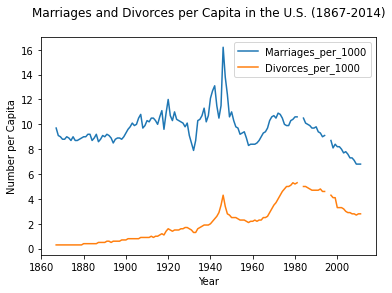

In [79]:
df.plot(x='Year',y=['Marriages_per_1000', 'Divorces_per_1000'])
plt.legend(['Marriages_per_1000', 'Divorces_per_1000'])
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)\n')
plt.show()

## Question-7

#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\us-marriages-divorces-1867-2014.csv")
df.head(10)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
6,1873,386000.0,13000.0,43225000,8.9,0.3
7,1874,385000.0,14000.0,44429000,8.7,0.3
8,1875,409000.0,14000.0,45492000,9.0,0.3
9,1876,405000.0,15000.0,46459000,8.7,0.3


In [82]:
data = {'Marriages per capita': [9.3, 12.0, 8.2],
        'Divorces per capita': [0.7, 2.5, 4.7]}

In [83]:
df = pd.DataFrame(data, index=[1900, 1950, 2000])

In [84]:
df

,Marriages per capita,Divorces per capita
1900,9.3,0.7
1950,12.0,2.5
2000,8.2,4.7


In [85]:
df_subset = df.loc[[1900, 1950, 2000]]

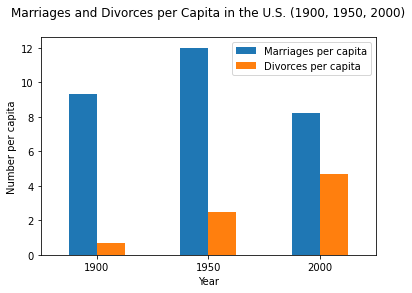

In [86]:
ax = df_subset.plot.bar(rot=0)
ax.set_xlabel('Year')
ax.set_ylabel('Number per capita')
ax.set_title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)\n')
ax.legend(loc='upper right')
plt.show()

## Question-8

#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [87]:
import matplotlib.pyplot as plt

# create data
deadliest_actors = pd.read_csv(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\actor_kill_counts.csv")
deadliest_actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


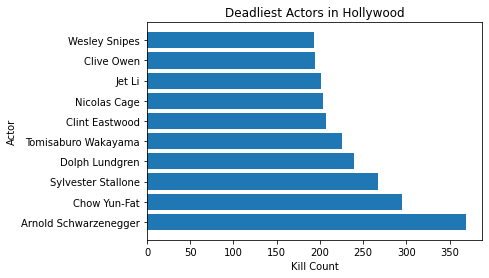

In [88]:
# sort data by count
data = sorted(zip(deadliest_actors['Count'], deadliest_actors['Actor']), reverse=True)

# create horizontal bar chart
plt.barh([i[1] for i in data], [i[0] for i in data])
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

## Question-9
#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
data = pd.read_csv(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\roman-emperor-reigns.csv")

In [90]:
data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


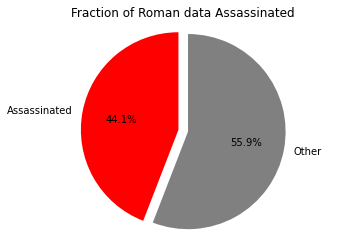

In [91]:
# Count the number of data who were assassinated
assassinated = data[data['Cause_of_Death'].str.contains('assassinated', case=False)].count()[0]

# Calculate the percentage of data who were assassinated
total = len(data)
percent = round(assassinated / total * 100, 2)

# Calculate the percentage of data who died of natural causes or other reasons
other_percent = round((total - assassinated) / total * 100, 2)

# Create a pie chart
labels = ['Assassinated', 'Other']
sizes = [percent, other_percent]
colors = ['red', 'gray']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Fraction of Roman data Assassinated')
plt.show()

## Question-10
#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [92]:
data = pd.read_csv(r"F:\Georgian_BDAT\BDAT_2023\BDAT_1004_Data_Programming\Assignment\PS-3\arcade-revenue-vs-cs-doctorates.csv")
data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


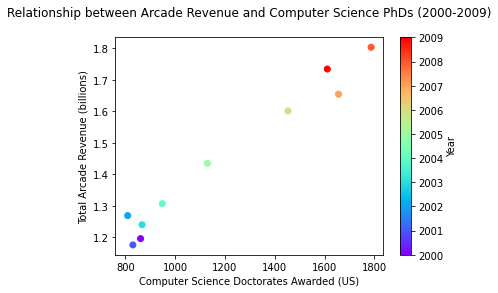

In [93]:
# Scatter plot
plt.scatter(data['Computer Science Doctorates Awarded (US)'], data['Total Arcade Revenue (billions)'], 
            c = data['Year'], cmap='rainbow')
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)\n')
plt.colorbar(label='Year')
plt.show()